In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn as skl 
import time 

## Problem 2: Moore's Law and Linear Regression (25 points)


Moore's Law states that the number of transistors on a microchip doubles approximately every two years, leading to an exponential increase in computing power. Using the provided historical data, given in `computational_methods_course/data/moores.csv`, perform the following tasks:

1. Load the data into a pandas DataFrame.
2. Use linear regression to model the relationship between the year and the number of transistors.
3. Plot the original data points and the fitted regression line.
4. Compute the doubling time of transistors based on your regression model, and compare it to the commonly cited value of two years.
5. (for fun). Compute the same regression for the first 10 years of the data and the last 10 years of the data. Has the doubling time changed over the history of computing?

In [40]:
# 1. Load the data into a pandas DataFrame.
fp = "/workspaces/computational_methods_course_nstrom/data/moores.csv"
df_m = pd.read_csv(fp,header=1)
print(df_m.columns)


Index(['Name', 'Transistor Count', 'Year', 'Manufacturer', 'Process', 'Area',
       'Source File'],
      dtype='str')


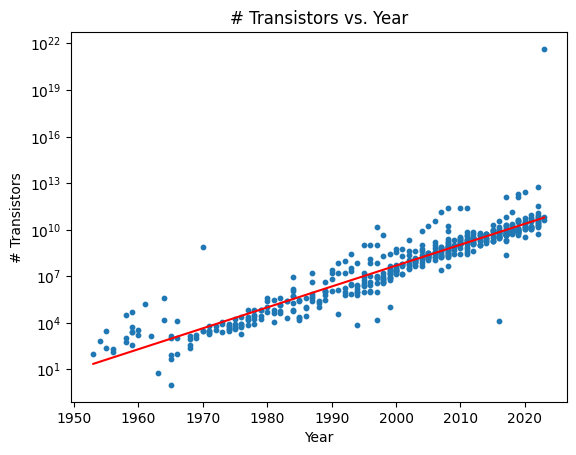

In [41]:
# 2. Use linear regression to model the relationship between the year and the number of transistors.

x = pd.to_numeric(df_m['Year'], errors='coerce')
y = pd.to_numeric(df_m['Transistor Count'], errors='coerce')

mask = np.isfinite(x) & np.isfinite(y) & (y > 0) 

x = x[mask].to_numpy(dtype=float).reshape(-1, 1)   # 2D for sklearn
y = y[mask].to_numpy(dtype=float)

model = skl.linear_model.LinearRegression(fit_intercept=True)
model.fit(x.reshape(-1,1),np.log10(y))
b1 = model.coef_
b0 = model.intercept_

y_mod = b0 + (b1 * x)

x_max = np.max(x); x_min = np.min(x)
y_max = np.max(y); y_min = np.min(y)

# 3. Plot the original data points and the fitted regression line.
plt.scatter(x,y,s=10)
plt.plot(x, 10**y_mod, color = "r")
plt.title('# Transistors vs. Year')
plt.ylabel('# Transistors')
plt.xlabel('Year')

plt.scatter
plt.yscale('log')
plt.show()

4. Compute the doubling time of transistors based on your regression model, and compare it to the commonly cited value of two years.

- log(y) = b0 + b1x
    - y = 10^(b0 +b1) = 10^(b0) * 10^(b1x)
- doubling of transitors (y): y(x + Td) = 2y(x) -> where Td is the time to doubling # of transistors
    - log10(10^b1Td) = log10(2)
        - b1Td = log10(2)
            - Td = log10(2) / b1

In [42]:
Td_set = np.log10(2) / b1
print(round(Td_set[0],2), 'years to doubling time from linear regression on entire dataset')
print('''The commonly cited transistor count doubling by Moore's Law is every 2 years''')

2.24 years to doubling time from linear regression on entire dataset
The commonly cited transistor count doubling by Moore's Law is every 2 years


In [43]:
def comp_LR(df,t,start_from,x_col,y_col):
    
    if start_from == 'start':
        t_strt = min(df_m[x_col])
        t_end = t_strt + t 
    elif start_from == 'end':
            mult = -1
            t_end = max(df_m[x_col])
            t_strt = t_end - t 

    df_sub = df_m[(df_m[x_col]>=t_strt) & (df_m[x_col]<=t_end)]

    x = pd.to_numeric(df_sub[x_col], errors='coerce')
    y = pd.to_numeric(df_sub[y_col], errors='coerce')

    mask = np.isfinite(x) & np.isfinite(y) & (y > 0) 

    x = x[mask].to_numpy(dtype=float).reshape(-1, 1)   # 2D for sklearn
    y = y[mask].to_numpy(dtype=float)

    model = skl.linear_model.LinearRegression(fit_intercept=True)
    model.fit(x.reshape(-1,1),np.log10(y))
    
    b1 = model.coef_[0]
    b0 = model.intercept_
    
    return(b0,b1,df_sub)

5. (for fun). Compute the same regression for the first 10 years of the data and the last 10 years of the data. Has the doubling time changed over the history of computing?

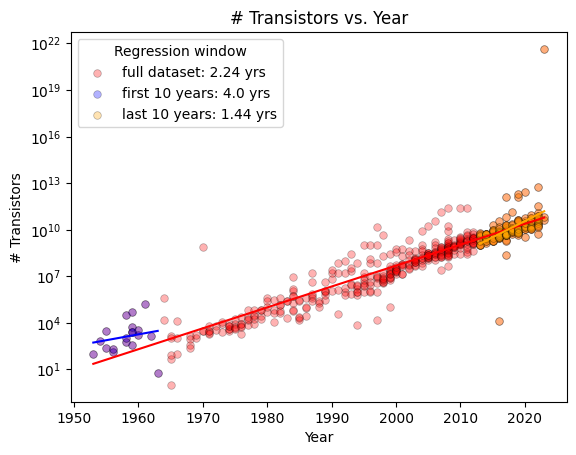

YES! the doubling time has changed across time!!!


In [44]:
b0,b1,df_f = comp_LR(df_m,1000,'start','Year','Transistor Count')
Td = np.log10(2) / b1
b0s,b1s,df_s = comp_LR(df_m,10,'start','Year','Transistor Count')
Td_s = np.log10(2) / b1s
b0e,b1e,df_e = comp_LR(df_m,10,'end','Year','Transistor Count')
Td_e = np.log10(2) / b1e

plots = [
    [[df_f, b0,  b1 ], 'red','full dataset'],    # full
    [[df_s, b0s, b1s], 'blue','first 10 years'],   # first 10 years
    [[df_e, b0e, b1e], 'orange','last 10 years']  # last 10 years
]


for plotset in plots:
    (df, b0, b1), color, tframe = plotset

    x = pd.to_numeric(df['Year'], errors='coerce')
    y = pd.to_numeric(df['Transistor Count'], errors='coerce')
    mask = np.isfinite(x) & np.isfinite(y) & (y > 0)

    x = x[mask].to_numpy(dtype=float).reshape(-1, 1)
    y = y[mask].to_numpy(dtype=float)

    y_mod = b0 + (b1 * x)

    order = np.argsort(x[:, 0])
    plt.plot(x[order], 10**y_mod[order], color=color)
    Td = np.log10(2) / b1
    
    plt.scatter(x, y, s=30, c=color,edgecolors='black',linewidths=0.5,
                alpha=0.3,label=f'{tframe}: {round(Td,2)} yrs')

plt.title('# Transistors vs. Year')
plt.ylabel('# Transistors')
plt.xlabel('Year')
plt.yscale('log')
plt.legend(title='Regression window')
plt.show()
print('YES! the doubling time has changed across time!!!')

## Problem 3: Row vs column order data access (25 points)
In this problem, you will explore the performance differences between row-major and column-major data access patterns using NumPy arrays. Perform the following tasks:

1. Create a large 2D NumPy array (e.g., 10,000 x 10,000) filled with random numbers from a distribution of your choosing.
2. Implement two functions to compute the sum of all elements in the array using python loops:
   - One function that accesses the array in row-major order.
   - Another function that accesses the array in column-major order.
3. Measure and compare the execution time of both functions using the `time` module or `timeit` library. Make sure to repeat the measurements multiple times (at least 30) to get an average execution time.
4. Compare the performance results to using built in NumPy functions for summing the array. Explain the differences in performance you observe, using concepts such as cache locality and memory access patterns.

In [45]:
# 1. Create a large 2D NumPy array (e.g., 10,000 x 10,000) filled with random numbers from a distribution of your choosing.
rng = np.random.default_rng(10)
big_ray = np.round(rng.random((5000, 5000)), 6)
big_ray

array([[0.956002, 0.207682, 0.828445, ..., 0.706978, 0.097672, 0.669664],
       [0.227252, 0.701161, 0.65006 , ..., 0.108436, 0.778164, 0.960269],
       [0.611824, 0.86607 , 0.24563 , ..., 0.905741, 0.602517, 0.281836],
       ...,
       [0.668357, 0.322814, 0.917704, ..., 0.147515, 0.650821, 0.765706],
       [0.01429 , 0.665136, 0.887587, ..., 0.282994, 0.393959, 0.321369],
       [0.744249, 0.690843, 0.856432, ..., 0.970748, 0.027746, 0.927246]],
      shape=(5000, 5000))

In [46]:
# 2. Implement two functions to compute the sum of all elements in the array using python loops:
# 3. Measure and compare the execution time of both functions using the `time` module or `timeit` library. 
    # Make sure to repeat the measurements multiple times (at least 30) to get an average execution time.

# - One function that accesses the array in row-major order.
iterations = 40

execution_times = {}

execution_times['row_manual'] = []
for itr in range(iterations):
    t_strt = time.time()
    row_calc = []
    for i in range(len(big_ray[:,0])):
        sum = 0
        sub = big_ray[i,:]
        for val in sub:
            sum += val
        row_calc.append(float(sum))
    dt = time.time() - t_strt
    execution_times['row_manual'].append(dt)

# - Another function that accesses the array in column-major order.
execution_times['col_manual'] = []
for itr in range(iterations):
    t_strt = time.time()
    col_calc = []
    for i in range(len(big_ray)):
        sum = 0
        sub = big_ray[:,i]
        for val in sub:
            sum += val
        col_calc.append(float(sum))
    dt = time.time() - t_strt
    execution_times['col_manual'].append(dt)


# 4. Compare the performance results to using built in NumPy functions for summing the array. 
execution_times['row_numpy'] = []
for itr in range(iterations):
    t_strt = time.time()
    row_calc = np.sum(big_ray, axis=1)   # row sums
    dt = time.time() - t_strt
    execution_times['row_numpy'].append(dt)

execution_times['col_numpy'] = []
for itr in range(iterations):
    t_strt = time.time()
    col_calc = np.sum(big_ray, axis=0)   # column sums
    dt = time.time() - t_strt
    execution_times['col_numpy'].append(dt)



In [47]:
for key in execution_times.keys():
    avg_time = np.mean(execution_times[key])
    print(f'{key}: {np.round(avg_time,6)} seconds')


row_manual: 3.771719 seconds
col_manual: 3.729684 seconds
row_numpy: 0.009273 seconds
col_numpy: 0.00832 seconds


Explain the differences in performance you observe, using concepts such as cache locality and memory access patterns.

- Loop computation: This is slower because within each iteration, the Python interpreter is used for computation. Within every iteration, a check of type is conducted on each element and retrieval of method for calculation. This reduces the ability to access memory from the CPU cache. THe memory access patterns of computing by column or row directly induces inefficient memory access patterns, reducing the cache locality to less efficient methods of memory retrieval, reducing the memory access. 

- Numpy: Much faster because the loops are compiled in C code in a fixed-type memory. This allows the CPU to access memory more sequentially and exiciently, reducing the need for slower memory retrieval methods such as from RAM. 

## Problem 4: Scaling and parallel computing (25 points)

In this problem, you will use Dask arrays to compute the element-wise standard score (z-score normalization) of a large random array and measure the scaling behavior across 1-4 CPU cores. The z-score is computed as: z = (x - μ) / σ, where μ is the mean and σ is the standard deviation.

Perform the following tasks:

1. Create a function that generates a large Dask array filled with random numbers and computes the z-score normalized array.
2. **Strong scaling**: Fix the array size (e.g., 20,000 x 20,000) and measure execution time using 1, 2, 3, and 4 cores. Calculate the speedup S(p) = T(1)/T(p) and efficiency E(p) = S(p)/p. Plot execution time vs number of cores.
3. **Weak scaling**: Scale the array size proportionally with the number of cores (maintaining constant work per core). Measure execution time for 1-4 cores and plot the results.
4. Discuss your results: Does your implementation achieve good scaling? What factors limit the speedup?

**Hint**: Configure the number of workers using `dask.config.set(num_workers=n)` and use `.compute()` to trigger computation.

In [48]:
import xarray as xr
import dask 
import dask.array as da
import time 
import numpy as np 
import matplotlib.pyplot as plt
import gc 

In [49]:
# 1. Create a function that generates a large Dask array filled with random numbers and computes the z-score normalized array.

def calc_znorm(dim, chunk, seed, ncores):
    with dask.config.set(num_workers=ncores):
        rng = da.random.default_rng(seed)
        x = rng.random((dim, dim), chunks=(chunk, chunk)).astype("float32")
        norm_x = (x - x.mean(axis=1, keepdims=True)) / x.std(axis=1, keepdims=True)
        return norm_x.mean().compute()   # forces full work, tiny output


In [50]:
# 2. **Strong scaling**: Fix the array size (e.g., 20,000 x 20,000) and measure execution time using 1, 2, 3, and 4 cores. 
    # Calculate the speedup S(p) = T(1)/T(p) and efficiency E(p) = S(p)/p. Plot execution time vs number of cores.

cores = np.arange(1,5)

dims = 20000
chunk = 2000

exec_times = {}

for ncore in cores:
    
    t_strt = time.time()
    out = calc_znorm(dims,chunk,10,ncore)
    dt = time.time()-t_strt 
    exec_times[int(ncore)] = dt

T1 = exec_times[1]
Sps_ss = []
Eps_ss = []

for ncore in cores:

    Sp = T1 / exec_times[ncore]
    Ep = float(Sp / ncore)

    Sps_ss.append(Sp)
    Eps_ss.append(Ep)

# 3. **Weak scaling**: Scale the array size proportionally with the number of cores (maintaining constant work per core). 
# Measure execution time for 1-4 cores and plot the results.

base_dim = 5000

exec_times = {}

for ncore in cores:
    dims = base_dim * ncore
    chunk = int(dims/10)
    t_strt = time.time()
    calc_znorm(dims,chunk,10,ncore)
    dt = time.time()-t_strt 
    exec_times[int(ncore)] = dt
T1_ws = exec_times[1]
Sps_ws = []
Eps_ws = []
for ncore in cores:
    Sp = T1_ws / exec_times[ncore]
    Ep = float(Sp / ncore)
    Sps_ws.append(Sp)
    Eps_ws.append(Ep)

(0.0, 1.4)

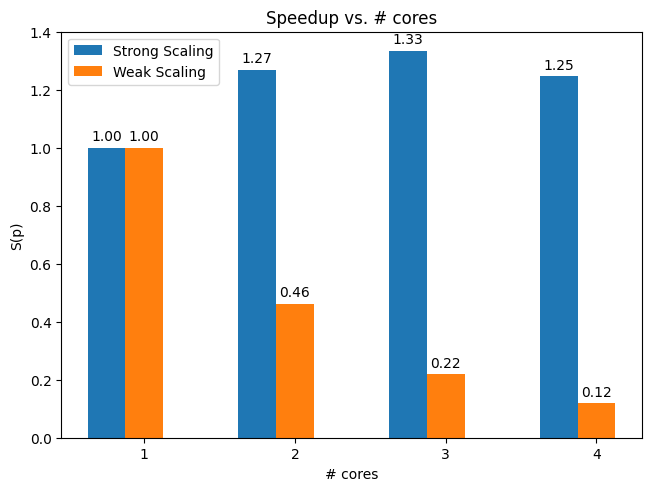

In [57]:

methods = {
    'Strong Scaling': Sps_ss,
    'Weak Scaling': Sps_ws
}

x = np.arange(len(cores))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in methods.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, fmt="%.2f",padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('# cores')
ax.set_ylabel('S(p)')
ax.set_title('Speedup vs. # cores')
ax.set_xticks(x + width, cores)
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, round(1.05*max(Sps_ss),2))



(0.0, 1.3)

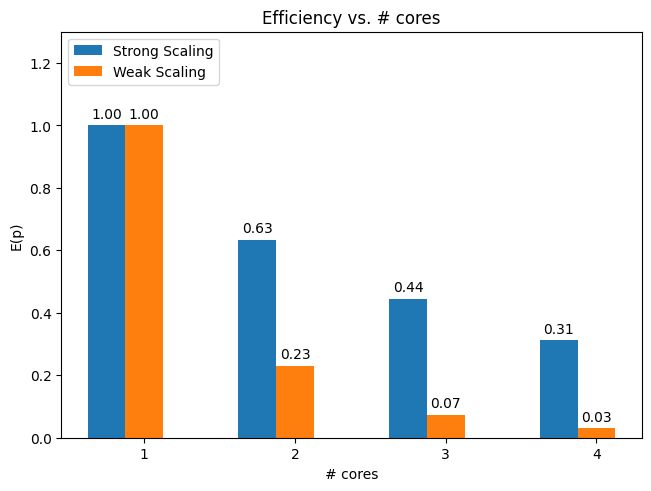

In [58]:


methods = {
    'Strong Scaling': Eps_ss,
    'Weak Scaling': Eps_ws
}

x = np.arange(len(cores))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in methods.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, fmt="%.2f",padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('# cores')
ax.set_ylabel('E(p)')
ax.set_title('Efficiency vs. # cores')
ax.set_xticks(x + width, cores)
ax.legend(loc='upper left', ncols=1)
ax.set_ylim(0, 1.3)